In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

def vec_bin_array(arr, m): #source:https://stackoverflow.com/questions/22227595/convert-integer-to-binary-array-with-suitable-padding
    to_str_func = np.vectorize(lambda x: np.binary_repr(x).zfill(m))
    strs = to_str_func(arr)
    ret = np.zeros(list(arr.shape) + [m], dtype=np.int8)
    for bit_ix in range(0, m):
        fetch_bit_func = np.vectorize(lambda x: x[bit_ix] == '1')
        ret[...,bit_ix] = fetch_bit_func(strs).astype("int8")
    return ret 
def bin_array(num, m):
    """Convert a positive integer num into an m-bit bit vector"""
    return np.array(list(np.binary_repr(num).zfill(m))).astype(np.int8)

In [2]:
w=np.random.randint(32, size=1000)
w_c=vec_bin_array(w,5)
print(w_c)
l,c=w_c.shape[0],w_c.shape[1]

[[1 0 0 0 0]
 [0 0 1 0 0]
 [0 1 0 0 1]
 ...
 [1 0 1 1 0]
 [0 0 0 0 0]
 [0 1 0 0 0]]


In [3]:
def ma_function(my_number):
    #my_number=23
    w_c_nb=[]

    for _ in range(my_number):
        temp = np.random.random(w_c.shape)< 0.1
        #w_c_nb.append(np.remainder((temp*1)+w_c,2))
        w_c_nb.append(temp*1)  #nous dit où sont les modifs

    re_nb=np.zeros_like(w_c)

    for i in range(my_number):
        re_nb=re_nb+w_c_nb[i]

    ree=np.zeros_like(w_c)

    for li in range(l):
        for co in range(c):
            if re_nb[li,co]>(math.floor(my_number/2)):
                ree[li,co]=1 #ie on change , sinon 0 on change pas

    v2=[]
    for i in range(l):
        v2.append(np.sum(ree[i]))

    v=np.array(v2)
    bb5 = np.count_nonzero(v==0)
    return bb5

#print('nombre de mots non modifiés :',bb5,'\nnombre de mots modifés',len(w_c)-bb5,'\ndonc pourcentage modifé:',(len(w_c)-bb5)/len(w_c))


In [19]:
for_mean=np.zeros(1000)
for i in range(1000):
    for_mean[i]=ma_function(231)
    
print(np.mean(for_mean))

1000.0


In [18]:
(1000-998.549)/1000

0.001451000000000022

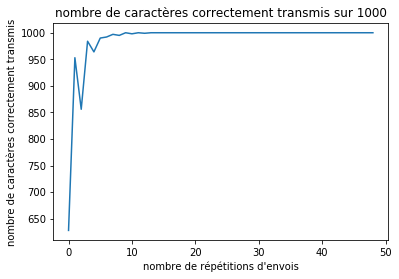

[628, 953, 856, 984, 964, 990, 992, 997, 995, 1000, 998, 1000, 999, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]


In [22]:
da=[ma_function(i) for i in range(1,50)]

plt.plot(da)
plt.xlabel("nombre de répétitions d'envois")
plt.ylabel('nombre de caractères correctement transmis')
plt.title("nombre de caractères correctement transmis sur 1000")
plt.show()

print(da)

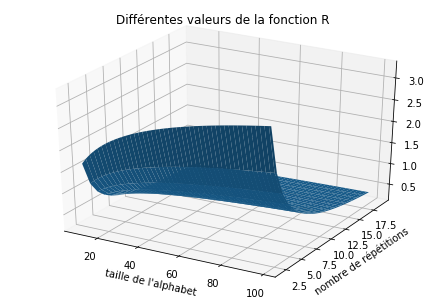

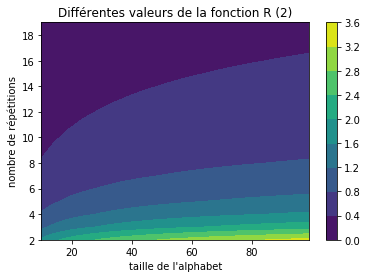

In [5]:
def ma_function2(M,n):
    return np.log2(M)/n
b=np.arange(10,100,1)
d=np.arange(2,20,1)

B, D = np.meshgrid(b, d)
nu = ma_function2(B,D)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(B, D, nu)
plt.xlabel("taille de l'alphabet")
plt.ylabel("nombre de répétitions")
plt.title('Différentes valeurs de la fonction R')
plt.show()


plt.contourf(B, D, nu)
normm=mpl.colors.Normalize(vmin=0, vmax=1)
plt.colorbar(norm=normm,cmap=mpl.cm.cool)
plt.xlabel("taille de l'alphabet")
plt.ylabel('nombre de répétitions')
plt.title('Différentes valeurs de la fonction R (2)')
plt.show()

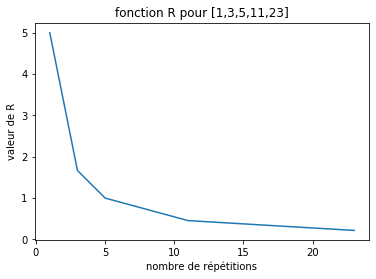

In [6]:
x=[1,3,5,11,23]
y=[ma_function2(32, x[i]) for i in range(len(x))]

plt.plot(x,y)
plt.xlabel("nombre de répétitions")
plt.ylabel('valeur de R')
plt.title('fonction R pour [1,3,5,11,23]')
plt.show()